In [2]:
import pandas as pd

# Load the data from the CSV file
file_path = "C:/Users/year3/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Function to identify the data type of each attribute
def identify_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return 'Numeric'
    elif pd.api.types.is_string_dtype(series):
        return 'Nominal'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    else:
        return 'Unknown'

# Apply the function to each column and store the result in a dictionary
attribute_data_types = {col: identify_data_type(df[col]) for col in df.columns}

# Display the data types of each attribute
for attribute, data_type in attribute_data_types.items():
    print(f'Attribute: {attribute}, Data Type: {data_type}')


Attribute: Record ID, Data Type: Numeric
Attribute: age, Data Type: Numeric
Attribute: sex, Data Type: Nominal
Attribute: on thyroxine, Data Type: Nominal
Attribute: query on thyroxine, Data Type: Nominal
Attribute: on antithyroid medication, Data Type: Nominal
Attribute: sick, Data Type: Nominal
Attribute: pregnant, Data Type: Nominal
Attribute: thyroid surgery, Data Type: Nominal
Attribute: I131 treatment, Data Type: Nominal
Attribute: query hypothyroid, Data Type: Nominal
Attribute: query hyperthyroid, Data Type: Nominal
Attribute: lithium, Data Type: Nominal
Attribute: goitre, Data Type: Nominal
Attribute: tumor, Data Type: Nominal
Attribute: hypopituitary, Data Type: Nominal
Attribute: psych, Data Type: Nominal
Attribute: TSH measured, Data Type: Nominal
Attribute: TSH, Data Type: Nominal
Attribute: T3 measured, Data Type: Nominal
Attribute: T3, Data Type: Nominal
Attribute: TT4 measured, Data Type: Nominal
Attribute: TT4, Data Type: Nominal
Attribute: T4U measured, Data Type: Nom

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the data from the CSV file
file_path = "C:/Users/year3/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Function to identify the data type of each attribute
def identify_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return 'Numeric'
    elif pd.api.types.is_string_dtype(series):
        unique_values = series.nunique()
        if unique_values < 10:  # Arbitrary threshold to distinguish categorical data
            return 'Nominal'
        else:
            return 'Text'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    else:
        return 'Unknown'

# Apply the function to each column and store the result in a dictionary
attribute_data_types = {col: identify_data_type(df[col]) for col in df.columns}

# Separate attributes by type
numeric_attributes = [col for col, dtype in attribute_data_types.items() if dtype == 'Numeric']
nominal_attributes = [col for col, dtype in attribute_data_types.items() if dtype == 'Nominal']
ordinal_attributes = []  # Add columns manually if you know they are ordinal

# Encoding categorical attributes
def encode_nominal(df, columns):
    for col in columns:
        df = pd.get_dummies(df, columns=[col], prefix=[col], drop_first=True)
    return df

def encode_ordinal(df, columns):
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

# Manually add ordinal attributes if known
# ordinal_attributes = ['your_ordinal_attribute'] 

# Encode nominal and ordinal attributes
df = encode_nominal(df, nominal_attributes)
df = encode_ordinal(df, ordinal_attributes)

# Display the first few rows of the encoded dataframe
print(df.head())


   Record ID  age  TSH   T3  TT4 T4U FTI TBG     Condition  sex_F  ...  \
0  840801013   29  0.3    ?    ?   ?   ?   ?  NO CONDITION      1  ...   
1  840801014   29  1.6  1.9  128   ?   ?   ?  NO CONDITION      1  ...   
2  840801042   41    ?    ?    ?   ?   ?  11  NO CONDITION      1  ...   
3  840803046   36    ?    ?    ?   ?   ?  26  NO CONDITION      1  ...   
4  840803047   32    ?    ?    ?   ?   ?  36             S      1  ...   

   T3 measured_t  TT4 measured_t  T4U measured_t  FTI measured_t  \
0              0               0               0               0   
1              1               1               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   TBG measured_t  referral source_SVHC  referral source_SVHD  \
0               0                     0                     0   
1               

In [4]:
import pandas as pd

# Load the data from the CSV file
file_path = "C:/Users/year3/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Function to identify the data type of each attribute
def identify_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return 'Numeric'
    elif pd.api.types.is_string_dtype(series):
        unique_values = series.nunique()
        if unique_values < 10:  # Arbitrary threshold to distinguish categorical data
            return 'Nominal'
        else:
            return 'Text'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    else:
        return 'Unknown'

# Apply the function to each column and store the result in a dictionary
attribute_data_types = {col: identify_data_type(df[col]) for col in df.columns}

# Separate numeric attributes
numeric_attributes = [col for col, dtype in attribute_data_types.items() if dtype == 'Numeric']

# Display the range for numeric variables
def display_numeric_ranges(df, columns):
    description = df[columns].describe()
    print(description)

# Example usage
display_numeric_ranges(df, numeric_attributes)


          Record ID           age
count  9.172000e+03   9172.000000
mean   8.529473e+08     73.555822
std    7.581969e+06   1183.976718
min    8.408010e+08      1.000000
25%    8.504090e+08     37.000000
50%    8.510040e+08     55.000000
75%    8.607110e+08     68.000000
max    8.701190e+08  65526.000000


In [5]:
import pandas as pd

# Load the data from the CSV file
file_path =  "C:/Users/year3/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Function to identify the data type of each attribute
def identify_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return 'Numeric'
    elif pd.api.types.is_string_dtype(series):
        unique_values = series.nunique()
        if unique_values < 10:  # Arbitrary threshold to distinguish categorical data
            return 'Nominal'
        else:
            return 'Text'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    else:
        return 'Unknown'

# Apply the function to each column and store the result in a dictionary
attribute_data_types = {col: identify_data_type(df[col]) for col in df.columns}

# Function to study the presence of missing values
def study_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values_percentage = (df.isnull().mean() * 100).round(2)
    missing_values_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
    return missing_values_df

# Example usage
missing_values_df = study_missing_values(df)
print(missing_values_df)


                           Missing Values  Percentage
Record ID                               0         0.0
age                                     0         0.0
sex                                     0         0.0
on thyroxine                            0         0.0
query on thyroxine                      0         0.0
on antithyroid medication               0         0.0
sick                                    0         0.0
pregnant                                0         0.0
thyroid surgery                         0         0.0
I131 treatment                          0         0.0
query hypothyroid                       0         0.0
query hyperthyroid                      0         0.0
lithium                                 0         0.0
goitre                                  0         0.0
tumor                                   0         0.0
hypopituitary                           0         0.0
psych                                   0         0.0
TSH measured                

Outliers in Record ID:
Empty DataFrame
Columns: [Record ID, age, sex, on thyroxine, query on thyroxine, on antithyroid medication, sick, pregnant, thyroid surgery, I131 treatment, query hypothyroid, query hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH measured, TSH, T3 measured, T3, TT4 measured, TT4, T4U measured, T4U, FTI measured, FTI, TBG measured, TBG, referral source, Condition]
Index: []

[0 rows x 31 columns]


Outliers in age:
      Record ID    age sex on thyroxine query on thyroxine  \
2976  850530001    455   F            f                  f   
5710  860210008  65511   M            f                  f   
6392  860403050  65512   M            f                  f   
8105  861014041  65526   F            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
2976                         f    f        f               f              f   
5710                         f    f        f               f              

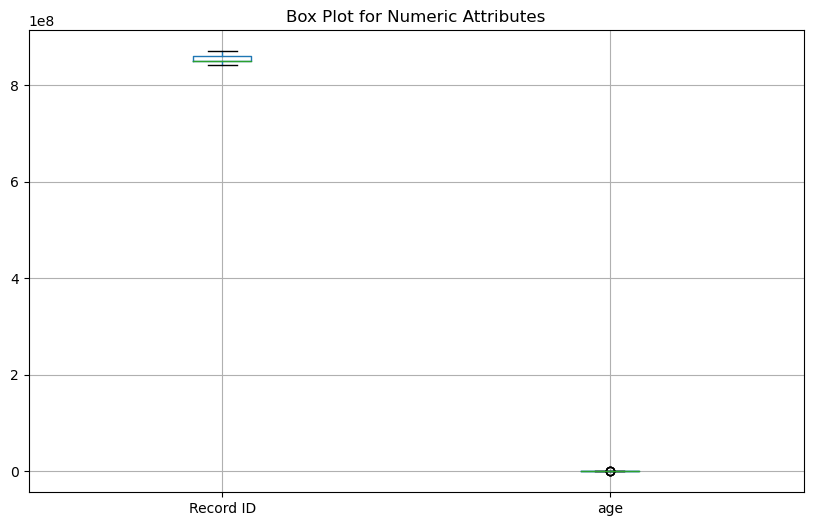

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = "C:/Users/year3/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Function to identify the data type of each attribute
def identify_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return 'Numeric'
    elif pd.api.types.is_string_dtype(series):
        unique_values = series.nunique()
        if unique_values < 10:  # Arbitrary threshold to distinguish categorical data
            return 'Nominal'
        else:
            return 'Text'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    else:
        return 'Unknown'

# Apply the function to each column and store the result in a dictionary
attribute_data_types = {col: identify_data_type(df[col]) for col in df.columns}

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for numeric attributes
numeric_attributes = [col for col, dtype in attribute_data_types.items() if dtype == 'Numeric']
outliers_dict = {col: detect_outliers_iqr(df, col) for col in numeric_attributes}

# Display the outliers
for attribute, outliers in outliers_dict.items():
    print(f'Outliers in {attribute}:')
    print(outliers)
    print('\n')

# Function to visualize outliers using box plots
def visualize_outliers(df, columns):
    df[columns].boxplot(figsize=(10, 6))
    plt.title('Box Plot for Numeric Attributes')
    plt.show()

# Example usage
visualize_outliers(df, numeric_attributes)


In [7]:
import pandas as pd

# Load the data from the CSV file
file_path = "C:/Users/year3/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Function to identify the data type of each attribute
def identify_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return 'Numeric'
    elif pd.api.types.is_string_dtype(series):
        unique_values = series.nunique()
        if unique_values < 10:  # Arbitrary threshold to distinguish categorical data
            return 'Nominal'
        else:
            return 'Text'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    else:
        return 'Unknown'

# Apply the function to each column and store the result in a dictionary
attribute_data_types = {col: identify_data_type(df[col]) for col in df.columns}

# Separate numeric attributes
numeric_attributes = [col for col, dtype in attribute_data_types.items() if dtype == 'Numeric']

# Calculate mean and variance (or standard deviation) for numeric attributes
def calculate_statistics(df, columns):
    statistics = {}
    for col in columns:
        mean = df[col].mean()
        variance = df[col].var()
        std_dev = df[col].std()
        statistics[col] = {'Mean': mean, 'Variance': variance, 'Standard Deviation': std_dev}
    return statistics

# Example usage
statistics = calculate_statistics(df, numeric_attributes)

# Display the statistics
for attribute, stats in statistics.items():
    print(f'Attribute: {attribute}')
    print(f'Mean: {stats["Mean"]}')
    print(f'Variance: {stats["Variance"]}')
    print(f'Standard Deviation: {stats["Standard Deviation"]}')
    print('\n')


Attribute: Record ID
Mean: 852947346.6122983
Variance: 57486250586150.34
Standard Deviation: 7581968.780346589


Attribute: age
Mean: 73.55582206716092
Variance: 1401800.8688713463
Standard Deviation: 1183.9767180444667




In [1]:
import pandas as pd

# Load the data from the CSV file
file_path = "C:/Users/year3/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Function to identify the data type of each attribute
def identify_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return 'Numeric'
    elif pd.api.types.is_string_dtype(series):
        unique_values = series.nunique()
        if unique_values < 10:  # Arbitrary threshold to distinguish categorical data
            return 'Nominal'
        else:
            return 'Text'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    else:
        return 'Unknown'

# Apply the function to each column and store the result in a dictionary
attribute_data_types = {col: identify_data_type(df[col]) for col in df.columns}

# Function to detect outliers using the IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Function to fill missing values
def fill_missing_values(df):
    for col, dtype in attribute_data_types.items():
        if dtype == 'Numeric':
            outliers = detect_outliers_iqr(df[col])
            if outliers.empty:
                # No outliers, use mean to fill missing values
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                # Outliers present, use median to fill missing values
                df[col].fillna(df[col].median(), inplace=True)
        elif dtype in ['Nominal', 'Categorical']:
            # Use mode to fill missing values
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Example usage
df_filled = fill_missing_values(df)

# Display the filled dataset
print(df_filled)

      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f    f       

In [2]:
import pandas as pd

# Load the data from the CSV file
file_path = "C:/Users/year3/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Function to identify the data type of each attribute
def identify_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return 'Numeric'
    elif pd.api.types.is_string_dtype(series):
        unique_values = series.nunique()
        if unique_values < 10:  # Arbitrary threshold to distinguish categorical data
            return 'Nominal'
        else:
            return 'Text'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    else:
        return 'Unknown'

# Apply the function to each column and store the result in a dictionary
attribute_data_types = {col: identify_data_type(df[col]) for col in df.columns}

# Function to detect outliers using the IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Function to fill missing values
def fill_missing_values(df):
    for col, dtype in attribute_data_types.items():
        if dtype == 'Numeric':
            outliers = detect_outliers_iqr(df[col])
            if not outliers.empty:
                # Outliers present, use median to fill missing values
                df[col].fillna(df[col].median(), inplace=True)
            else:
                # No outliers, use mean to fill missing values
                df[col].fillna(df[col].mean(), inplace=True)
        elif dtype in ['Nominal', 'Categorical']:
            # Use mode to fill missing values
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Example usage
df_filled = fill_missing_values(df)

# Display the filled dataset
print(df_filled)


      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f    f       

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the data from the CSV file
file_path = "C:/Users/year3/Documents/thyroid0387_UCI.csv"
df = pd.read_csv(file_path)

# Function to identify the data type of each attribute
def identify_data_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return 'Numeric'
    elif pd.api.types.is_string_dtype(series):
        unique_values = series.nunique()
        if unique_values < 10:  # Arbitrary threshold to distinguish categorical data
            return 'Nominal'
        else:
            return 'Text'
    elif pd.api.types.is_categorical_dtype(series):
        return 'Categorical'
    elif pd.api.types.is_datetime64_any_dtype(series):
        return 'Datetime'
    else:
        return 'Unknown'

# Apply the function to each column and store the result in a dictionary
attribute_data_types = {col: identify_data_type(df[col]) for col in df.columns}

# Identify numeric attributes
numeric_attributes = [col for col, dtype in attribute_data_types.items() if dtype == 'Numeric']

# Function to detect outliers using the IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Normalization/Scaling
def normalize_data(df):
    scaler_minmax = MinMaxScaler()
    scaler_standard = StandardScaler()
    
    for col in numeric_attributes:
        # Detect outliers
        outliers = detect_outliers_iqr(df[col])
        
        if not outliers.empty:
            # Apply standardization for attributes with outliers
            df[[col]] = scaler_standard.fit_transform(df[[col]])
        else:
            # Apply min-max normalization for attributes without outliers
            df[[col]] = scaler_minmax.fit_transform(df[[col]])
    
    return df

# Example usage
df_normalized = normalize_data(df)

# Display the normalized dataset
print(df_normalized)


         Record ID       age sex on thyroxine query on thyroxine  \
0     0.000000e+00 -0.037634   F            f                  f   
1     3.410871e-08 -0.037634   F            f                  f   
2     9.891527e-07 -0.027499   F            f                  f   
3     6.934301e-05 -0.031722   F            f                  f   
4     6.937712e-05 -0.035100   F            f                  f   
...            ...       ...  ..          ...                ...   
9167  9.999996e-01 -0.014829   M            f                  f   
9168  9.999996e-01 -0.043547   M            f                  f   
9169  9.999997e-01 -0.003848   M            f                  f   
9170  9.999997e-01 -0.022431   F            f                  f   
9171  1.000000e+00 -0.035945   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                        